<h3><font color='white'><b>CASE STUDY: Store Segmentation</b></font></h3>

<h3><font color='yellow'><b>Setting Up Environment</b></font></h3>

In [1]:
# import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# set file parameters
pd.set_option('display.float_format', lambda x: '%.4f' % x)

<h3><font color='yellow'><b>Configuring Study Parameters</b></font></h3>

In [3]:
# create config class
class C:
    CURRENT_DIRECTORY = os.getcwd()

<h3><font color='yellow'><b>Defining Functions</b></font></h3>

In [4]:
def alter_dtypes(df):
    return df

def calculate_memory_usage(df):
    pass

def correct_column_names(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    return df

def validate_primary_key(df):
    n_entity = df.shape[0]
    primary_key_columns = [column for column in df.columns if df[column].nunique() == n_entity]
    print(f"The primary key column(s) is/are: {', '.join(primary_key_columns)}")
            
def demonstrate_basic_stats(df):
    stats = f"Shape: {df.shape}\nMemory: {calculate_memory_usage(df)}GB\nColumns: {list(df.columns)}\nDtypes: {dict(df.dtypes)}\n"
    print(stats)

def perform_hypothesis_test(df, alpha, target_column, evaluated_column):

    first_group = df[df[evaluated_column].notna()][target_column]
    second_group = df[df[evaluated_column].isna()][target_column]

    stat, p_value = ttest_ind(first_group, second_group, equal_var = False)

    return p_value < alpha

def drop_missing_columns(df, alpha, drop_rate, target_column, evaluated_column):
    
    columns_to_drop = []
    missing_percentages = (df.isnull().sum() / df.shape[0]) * 100

    for column in df.columns:
        if missing_percentages[column] < drop_rate:
            continue
    
        # perform hypothesis test
        effect = perform_hypothesis_test(df, alpha, target_column, evaluated_column)

        # append column into the list if it has a statistical effect
        if effect:
            columns_to_drop.append(column)
    
    df = df.drop(columns=columns_to_drop)

    return df

<h3><font color='yellow'><b>Loading Datasets</b></font></h3>

In [5]:
# define filepath
filepath = C.CURRENT_DIRECTORY + '\\datasets\\unilever.xlsx'

# read datasets
unilever_sales_transaction = pd.read_excel(filepath, sheet_name = 'Sales Transaction')
unilever_customer_information = pd.read_excel(filepath, sheet_name = 'Customer Information')
unilever_visit_transaction = pd.read_excel(filepath, sheet_name = 'Visit Transaction')

# copy datasets
df_st = unilever_sales_transaction.copy()
df_ci = unilever_customer_information.copy()
df_vt = unilever_visit_transaction.copy()

In [6]:
# optimize memory usage of datasets
df_st, df_ci, df_vt = alter_dtypes(df_st), alter_dtypes(df_ci), alter_dtypes(df_vt)

In [7]:
# correct column names
df_st, df_ci, df_vt = correct_column_names(df_st), correct_column_names(df_ci), correct_column_names(df_vt)

In [8]:
# format datetime before passing data understanding phase
df_st['transaction_date'] =pd.to_datetime(df_st['transaction_date'])

<h3><font color='yellow'><b>Demonstrating Basic Statistics</b></font></h3>

In [9]:
demonstrate_basic_stats(df_st)

Shape: (19811, 9)
Memory: NoneGB
Columns: ['customerid', 'transaction_date', 'categoryid', 'brandid', 'productgroupid', 'productid', 'sales_amount', 'unit_price', 'sales_value']
Dtypes: {'customerid': dtype('int64'), 'transaction_date': dtype('<M8[ns]'), 'categoryid': dtype('O'), 'brandid': dtype('O'), 'productgroupid': dtype('O'), 'productid': dtype('O'), 'sales_amount': dtype('int64'), 'unit_price': dtype('float64'), 'sales_value': dtype('float64')}



In [10]:
demonstrate_basic_stats(df_ci)

Shape: (100, 29)
Memory: NoneGB
Columns: ['customerid', 'is_there_a_competitor_cabinet', 'number_of_cabinets', 'distributor_name', 'store_m2_', 'educational_instutition(#)', 'transportation_points(#)', 'discounter_market(#)', 'national_market(#)', 'avg_of_ages', 'population_age_between_(0-14)', 'population_age_between_(15-24)', 'population_age_between_(25-34)', 'population_age_between_(35-44)', 'population_age_between_(45-54)', 'population_age_between(55-64)', 'population_age_between_(65+)', 'income_level_1_(#)', 'income_level_2_(#)', 'income_level_3_(#)', 'income_level_4_(#)', 'income_level_5_(#)', 'income_level_6_(#)', 'avg_income_level_(lower_is_higher)', 'elementary_degree_(#)', 'high_school_degree_(#)', 'university_degree_(#)', 'high_school_or_higher_degrees_(#)', 'avg_year_of_education_(year)']
Dtypes: {'customerid': dtype('int64'), 'is_there_a_competitor_cabinet': dtype('O'), 'number_of_cabinets': dtype('int64'), 'distributor_name': dtype('O'), 'store_m2_': dtype('int64'), 'educ

In [11]:
demonstrate_basic_stats(df_vt)

Shape: (3070, 2)
Memory: NoneGB
Columns: ['customerid', 'date']
Dtypes: {'customerid': dtype('int64'), 'date': dtype('<M8[ns]')}



<h3><font color='yellow'><b>Identify Primary Keys</b></font></h3>

In [12]:
validate_primary_key(df_st)

The primary key column(s) is/are: 


In [13]:
validate_primary_key(df_ci)

The primary key column(s) is/are: customerid


In [14]:
validate_primary_key(df_vt)

The primary key column(s) is/are: 


<h3><font color='yellow'><b>Data Understanding</b></font></h3>

<h3><font color='gray'><b>customerid</b></font></h3>

In [15]:
df_st.customerid.nunique(), df_ci.customerid.nunique(), df_vt.customerid.nunique()

(95, 100, 99)

In [16]:
df_st.customerid.shape[0], df_ci.customerid.shape[0], df_vt.customerid.shape[0] # customerid is primary key for df_ci

(19811, 100, 3070)

In [17]:
# check there is any customer that has no information
len(set(df_ci.customerid.unique()) | set(df_st.customerid.unique()) | set(df_st.customerid.unique())) # validated that every customer has information

100

In [18]:
# find customers that have no sales transactions
no_st_customers = set(df_ci.customerid.unique()) - set(df_st.customerid.unique())
no_st_customers

{4, 10, 16, 50, 74}

In [19]:
# find customers that have no visit transactions
no_vt_customers = set(df_ci.customerid.unique()) - set(df_vt.customerid.unique())
no_vt_customers

{8}

In [20]:
# tbd
set(df_vt.customerid.unique()) - set(df_st.customerid.unique())

{4, 10, 16, 50, 74}

In [21]:
# tbd
set(df_st.customerid.unique()) - set(df_vt.customerid.unique())

{8}

<h3><font color='gray'><b>number_of_cabinets</b></font></h3>

In [22]:
df_ci.number_of_cabinets.min(), df_ci.number_of_cabinets.max(), df_ci.number_of_cabinets.mean()

(1, 4, 2.19)

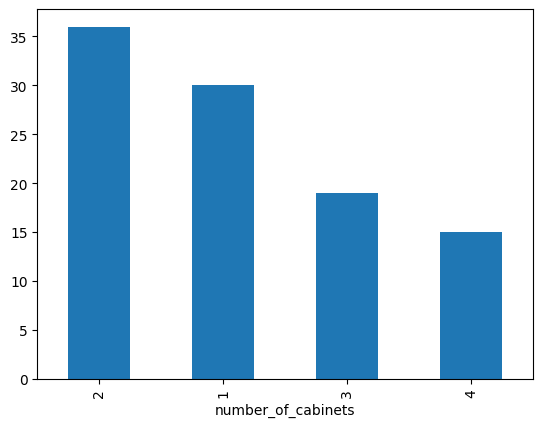

In [23]:
df_ci.number_of_cabinets.value_counts().sort_values(ascending=False).plot(kind='bar');

<h3><font color='gray'><b>is_there_a_competitor_cabinet</b></font></h3>

In [24]:
df_ci.is_there_a_competitor_cabinet.value_counts()

is_there_a_competitor_cabinet
N    86
Y    14
Name: count, dtype: int64

In [25]:
competitor_cabinet_owned_customers = df_ci[df_ci['is_there_a_competitor_cabinet'] == 'Y'].customerid.values
competitor_cabinet_owned_customers

array([ 6, 22, 31, 34, 43, 52, 60, 65, 77, 79, 80, 82, 87, 88],
      dtype=int64)

In [26]:
df_st[df_st.customerid.isin(competitor_cabinet_owned_customers)][['customerid','sales_amount', 'unit_price', 'sales_value']].groupby(by='customerid')\
                                                                                                                            .agg(['sum','count'])\
                                                                                                                            .sort_values(by=('sales_value','sum'), ascending=False)

sales_amount       unit_price       sales_value      
                    sum count        sum count         sum count
customerid                                                      
6                 12042   497  5236.4800   497  57077.0000   497
82                12574   506  5806.2800   506  52636.6700   506
60                12297   452  4970.1900   452  50167.0200   452
80                13956   575  4112.3100   575  39799.8900   575
65                10595   371  3388.9200   371  30105.8900   371
79                 9323   231  2152.4300   231  26031.7500   231
31                 9190   188  1064.8600   188  22038.3200   188
77                 5386   186  1727.3300   186  20461.1800   186
43                 9120   211  1249.4800   211  20214.5300   211
22                 8398   128   907.2300   128  18552.3200   128
34                 7573   139  1039.4100   139  18305.7000   139
87                 9751   158   508.6900   158  16273.7100   158
88                 4882    56   318.8100    56  10409.8800    56
52                 4384    44   181.2600    44   4933.9200    44

In [27]:
df_st[~df_st.customerid.isin(competitor_cabinet_owned_customers)][['customerid','sales_amount', 'unit_price', 'sales_value']].groupby(by='customerid')\
                                                                                                                             .agg(['sum','count'])\
                                                                                                                             .sort_values(by=('sales_value','sum'), ascending=False)\
                                                                                                                             .head(len(competitor_cabinet_owned_customers))

sales_amount       unit_price       sales_value      
                    sum count        sum count         sum count
customerid                                                      
7                 10545   428  3775.9300   428  46405.2100   428
56                15219   398  1645.5500   398  45529.5300   398
5                 15230   597  3493.4800   597  43731.9400   597
23                14437   535  3138.6200   535  41510.3500   535
12                15770   547  2754.7100   547  38755.9000   547
11                14091   590  4234.8900   590  37407.2900   590
64                11253   356  3381.4800   356  36969.7900   356
42                 9007   208  1121.3900   208  32418.7800   208
18                15379   499  2276.6100   499  32398.0400   499
55                11181   330  3054.7000   330  32368.5400   330
95                11525   332  2885.9300   332  32030.3600   332
53                 7814   224  1740.5100   224  31899.2200   224
61                12765   346  2266.1600   346  31429.0400   346
73                12274   458  2676.9500   458  28394.0900   458

<h3><font color='gray'><b>time intervals</b></font></h3>

In [28]:
df_vt.date.min(), df_vt.date.max(), df_vt.date.max() - df_vt.date.min()

(Timestamp('2021-05-03 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timedelta('120 days 00:00:00'))

In [29]:
df_st['transaction_date'] =pd.to_datetime(df_st['transaction_date'])

In [30]:
df_st.transaction_date.min(), df_st.transaction_date.max(), df_st.transaction_date.max() - df_st.transaction_date.min()

(Timestamp('1970-01-01 00:00:00.000044319'),
 Timestamp('2021-08-31 00:00:00'),
 Timedelta('18869 days 23:59:59.999955681'))

<h3><font color='yellow'><b>Feature Engineering</b></font></h3>

<h3><font color='gray'><b>ds_st</b></font></h3>

<h4><font color='lightgreen'><b>Which informations can be extracted?</b></font></h4>
<li><font color='white'>?</font></li>

<h3><font color='gray'><b>ds_vt</b></font></h3>

<h4><font color='lightgreen'><b>Which informations can be extracted?</b></font></h4>
<li><font color='white'>total_visit of each customers</font></li>
<li><font color='white'>visit_frequency of each customers</font></li>
<li><font color='white'>first_and_last_visit_interval of each customers</font></li>

In [31]:
df_vt.head()

,customerid,date
0,89,2021-05-05
1,15,2021-07-13
2,93,2021-08-10
3,41,2021-07-27
4,93,2021-05-20


In [32]:
df_vt.tail()

,customerid,date
3065,42,2021-05-24
3066,71,2021-06-17
3067,60,2021-06-19
3068,51,2021-06-18
3069,51,2021-08-31


In [33]:
df_vt.date.min(), df_vt.date.max(), df_vt.date.max() - df_vt.date.min()

(Timestamp('2021-05-03 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timedelta('120 days 00:00:00'))

In [34]:
# calculate total visit for each customer
agg_counts = df_vt.groupby(by='customerid').agg({'date':'count'}).reset_index().rename(columns={'date': 'total_visit'})

# add this feature into the df_ci
df_ci = pd.merge(df_ci, agg_counts, on='customerid', how='left')

In [35]:
df_vt.groupby(by='customerid').agg({'date':'count'}).reset_index()

,customerid,date
0,1,33
1,2,34
2,3,35
3,4,32
4,5,33
...,...,...
94,96,34
95,97,5
96,98,29
97,99,4


In [36]:
agg_counts = df_vt.groupby(by='customerid').agg({'date':'count'}).reset_index().rename(columns={'date': 'total_visit'})
df_ci = pd.merge(df_ci, agg_counts, on='customerid', how='left')

<h3><font color='yellow'><b>Correlation Analysis</b></font></h3>

<h3><font color='yellow'><b>Handling Missing Values</b></font></h3>

<h3><font color='yellow'><b>Fixing Outliers</b></font></h3>